# **TikTok - EDA and Data Visualization Project**

![](https://upload.wikimedia.org/wikipedia/en/thumb/a/a9/TikTok_logo.svg/500px-TikTok_logo.svg.png?20200415104610)

## Summary
This project aims to delve into a dataset from TikTok, focusing on distinguishing factors between claim and opinion videos. It consists of four key components:

**Part 1: Imports, Links, and Loading:** This phase involves importing necessary libraries, establishing links to relevant data sources, and loading the dataset for analysis.

**Part 2: Data Exploration:** Within this segment, the emphasis lies on comprehensively exploring the dataset. This encompasses data cleaning procedures aimed at enhancing data quality and integrity.

**Part 3: Build Visualizations:** In this stage, the primary objective is to construct professional-grade data visualizations. Visualizations were done both in python using the appropriate libraries or with Tableau (links to the visualizations are listed in the section).

**Part 4: Evaluate and Share Results:** The final phase involves evaluating the outcomes of the exploratory analysis. It is crucial to extract meaningful insights from the visualizations generated in the previous step. The ultimate goal is to present these findings in a manner conducive to informed decision-making for business purposes.

The overarching purpose of this project is to conduct a comprehensive exploration of the dataset, with a focus on discerning distinctions between claim and opinion videos. By performing thorough exploratory data analysis and crafting informative visualizations, the project endeavors to extract actionable insights beneficial for driving data-driven decisions in a professional context.

**Note**
This project was done as the final assignment of the [Go Beyond the Numbers: Translate Data into Insights](https://www.coursera.org/learn/go-beyond-the-numbers-translate-data-into-insight) course, which is a part of the [Google Advanced Data Analytics](https://www.coursera.org/professional-certificates/google-advanced-data-analytics) certification.

# **Visualize a story in Tableau and Python**

### Importing libraries and loading dataset

In [2]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading dataset
df = pd.read_csv("tiktok_dataset.csv")

### Cleaning and initial data exploration

In [3]:
# Taking a look at the first 5 rows
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Data types for the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
# Basic statisical summary of the numerical columns in the dataset
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [6]:
# Finding out the number of missing values
null_values = df.isnull().sum()
print(null_values)

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64


It seems like there are 298 rows with null values in them

In [7]:
# Finding out which rows in the dataframe have missing values
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)

           # claim_status    video_id  video_duration_sec  \
19084  19085          NaN  4380513697                  39   
19085  19086          NaN  8352130892                  60   
19086  19087          NaN  4443076562                  25   
19087  19088          NaN  8328300333                   7   
19088  19089          NaN  3968729520                   8   
...      ...          ...         ...                 ...   
19377  19378          NaN  7578226840                  21   
19378  19379          NaN  6079236179                  53   
19379  19380          NaN  2565539685                  10   
19380  19381          NaN  2969178540                  24   
19381  19382          NaN  8132759688                  13   

      video_transcription_text verified_status author_ban_status  \
19084                      NaN    not verified            active   
19085                      NaN    not verified            active   
19086                      NaN    not verified            activ

In [8]:
# Removing the rows with missing values
df = df.dropna()

### Visualizing the data

Now that you have assessed your data, it’s time to plot your visualization(s).

#### Video Duration

Boxplot

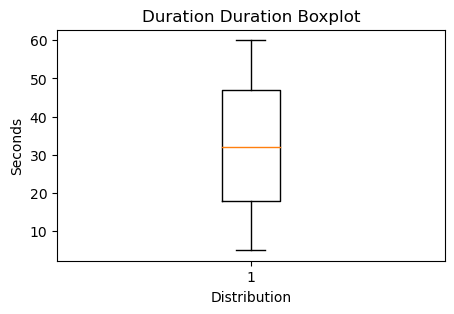

In [9]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['video_duration_sec'])
plt.xlabel('Distribution')
plt.ylabel('Seconds')
plt.title('Duration Duration Boxplot')
plt.show()

Histogram

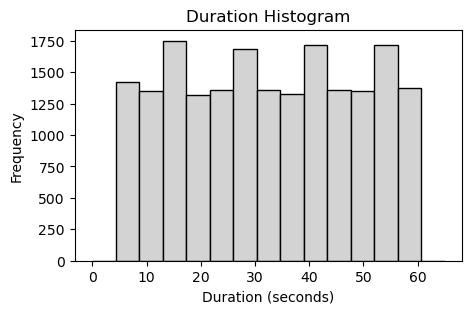

In [10]:
plt.figure(figsize=(5, 3))
plt.hist(df['video_duration_sec'], 
         bins=15, 
         range=[0,65], 
         edgecolor='black', 
         color='lightgrey')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Duration Histogram')
plt.show()

Tendency of videos to be around 30s in length, as well as 15, 45 and 60. 15second interval between each.

#### View Count

Boxplot

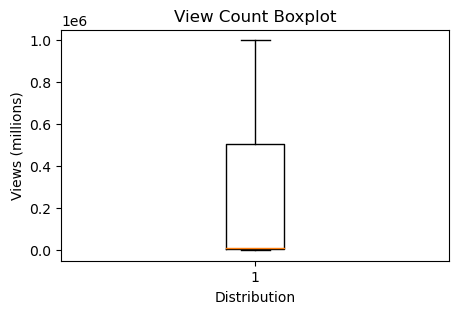

In [11]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['video_view_count'])
plt.xlabel('Distribution')
plt.ylabel('Views (millions)')
plt.title('View Count Boxplot')
plt.show()

Histogram

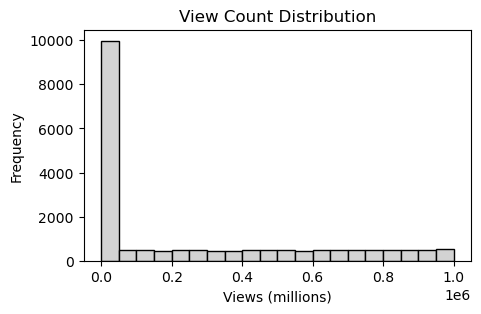

In [12]:
plt.figure(figsize=(5, 3))
plt.hist(df['video_view_count'], 
         bins=20, 
         range=[0,df['video_view_count'].max()], 
         edgecolor='black', 
         color='lightgrey')
plt.xlabel('Views (millions)')
plt.ylabel('Frequency')
plt.title('View Count Distribution')
plt.show()

**Question:** What do you notice about the distribution of this variable?

#### Like Count

Boxplot

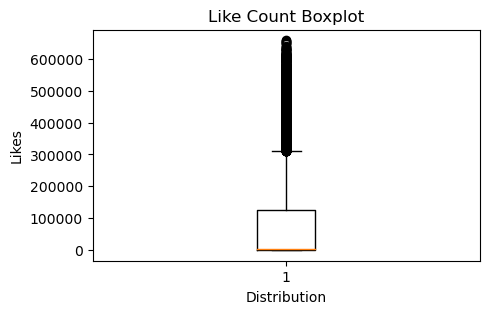

In [13]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['video_like_count'])
plt.xlabel('Distribution')
plt.ylabel('Likes')
plt.title('Like Count Boxplot')
plt.show()

Many outliers positioned above the mean of roughly 300,000 likes.

Histogram

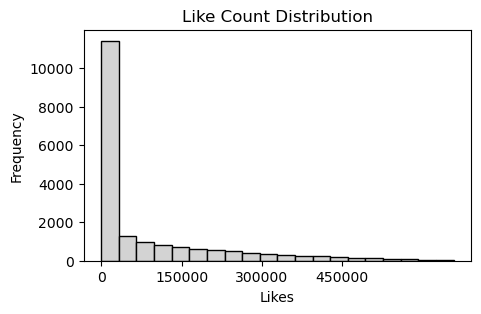

In [14]:
plt.figure(figsize=(5, 3))
plt.hist(df['video_like_count'], 
         bins=20, 
         range=[0,df['video_like_count'].max()], 
         edgecolor='black', 
         color='lightgrey')
plt.xticks(range(0,600000,150000))
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.title('Like Count Distribution')
plt.show()


**Question:** What do you notice about the distribution of this variable?

#### Comment count

Boxplot

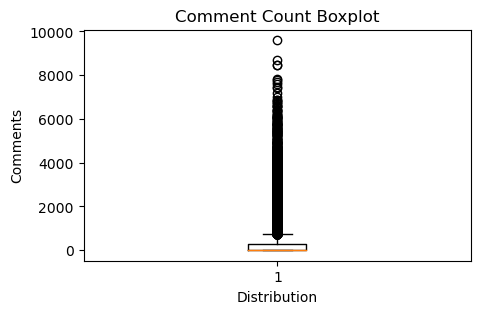

In [15]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['video_comment_count'])
plt.xlabel('Distribution')
plt.ylabel('Comments')
plt.title('Comment Count Boxplot')
plt.show()

Histogram

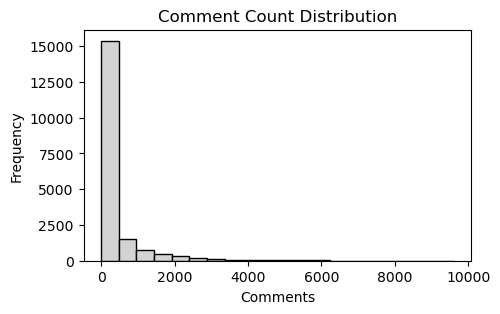

In [16]:
plt.figure(figsize=(5, 3))
plt.hist(df['video_comment_count'], 
         bins=20, 
         range=[0,df['video_comment_count'].max()], 
         edgecolor='black', 
         color='lightgrey')
plt.xlabel('Comments')
plt.ylabel('Frequency')
plt.title('Comment Count Distribution')
plt.show()

**Question:** What do you notice about the distribution of this variable?

#### Share Count

Boxplot

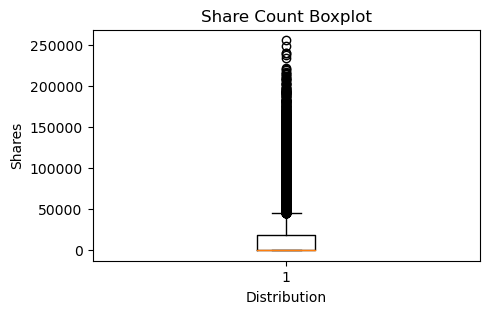

In [17]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['video_share_count'])
plt.xlabel('Distribution')
plt.ylabel('Shares')
plt.title('Share Count Boxplot')
plt.show()

Histogram

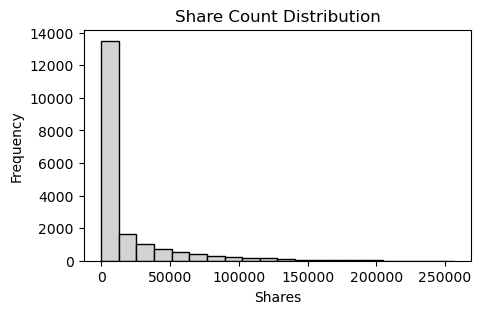

In [18]:
plt.figure(figsize=(5, 3))
plt.hist(df['video_share_count'], 
         bins=20, range=[0,df['video_share_count'].max()], 
         edgecolor='black', 
         color='lightgrey')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.title('Share Count Distribution')
plt.show()

#### Download count

Boxplot

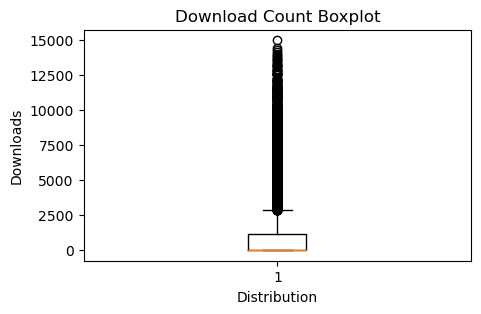

In [19]:
plt.figure(figsize=(5, 3))
plt.boxplot(df['video_download_count'])
plt.xlabel('Distribution')
plt.ylabel('Downloads')
plt.title('Download Count Boxplot')
plt.show()

Histogram

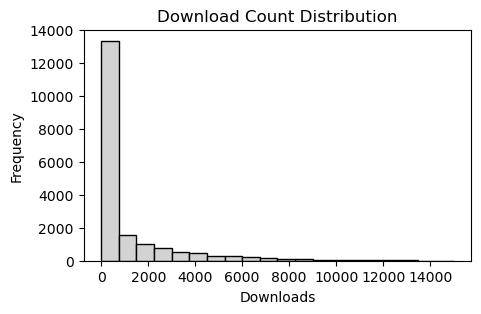

In [20]:
plt.figure(figsize=(5, 3))
plt.hist(df['video_download_count'], 
         bins=20, 
         range=[0,df['video_download_count'].max()], 
         edgecolor='black', 
         color='lightgrey')
plt.xlabel('Downloads')
plt.ylabel('Frequency')
plt.title('Download Count Distribution')
plt.show()

**Question:** What do you notice about the distribution of this variable?

#### **Claim status by verification status**

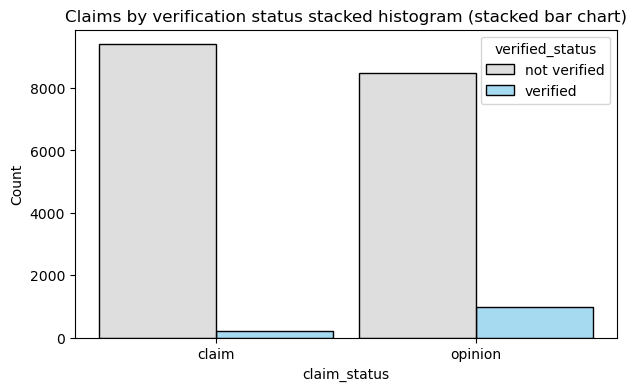

In [41]:
colors = {'verified': 'skyblue', 'not verified': 'lightgrey'  }

plt.figure(figsize=(7,4))
sns.histplot(df, 
             x='claim_status', 
             hue='verified_status', 
             palette=colors, 
             multiple='dodge', 
             shrink=0.9)
plt.title('Claims by verification status stacked histogram (stacked bar chart)');

There is a much greater number of unverified claims and opinions, when compared to their verified counterparts. This suggests most of the claims and opinions are not being assesed, either due to a technical error or insufficient capacity of verification by employees.

#### **Claim status by author ban status**

The previous course used a `groupby()` statement to examine the count of each claim status for each author ban status. Now, use a histogram to communicate the same information.

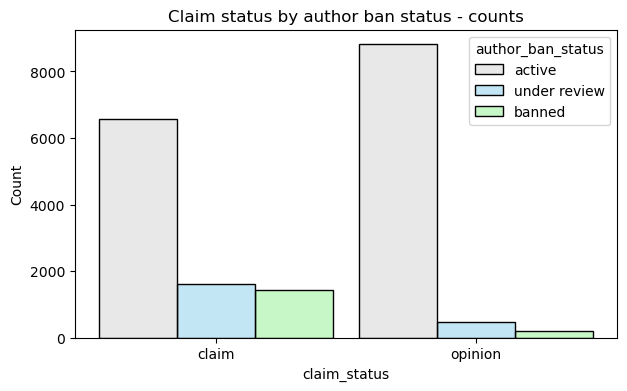

In [40]:
fig = plt.figure(figsize=(7,4))
sns.histplot(df, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'lightgrey', 'under review':'skyblue', 'banned':'lightgreen'},
             alpha=0.5)
plt.title('Claim status by author ban status - counts');

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

#### **Median view counts by ban status**

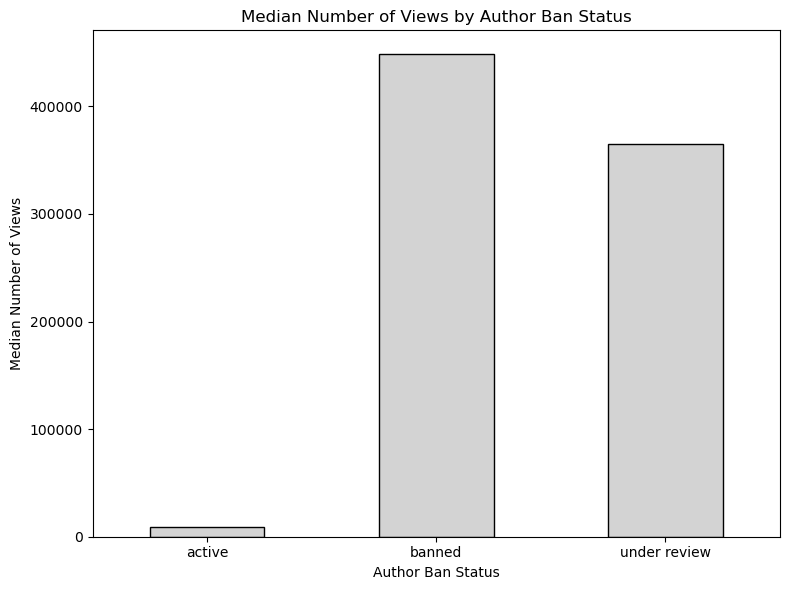

In [47]:
median_views = df.groupby('author_ban_status')['video_view_count'].median()

plt.figure(figsize=(8, 6))
median_views.plot(kind='bar', color='lightgrey', edgecolor='black')
plt.title('Median Number of Views by Author Ban Status')
plt.xlabel('Author Ban Status')
plt.ylabel('Median Number of Views')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Given that the bars for banned and under review ban statuses are much taller than for active status, it suggests that videos associated with non-active authors (banned or under review) tend to have higher median view counts compared to videos associated with active authors.

This insight might indicate that 'video_view_count' could be a valuable indicator of 'claim_status'. If videos from authors with banned or under review statuses tend to have higher view counts, it could potentially suggest a correlation between view count and the likelihood of a claim being filed (or 'claim_status' being active).

#### **Median view counts by claim status**

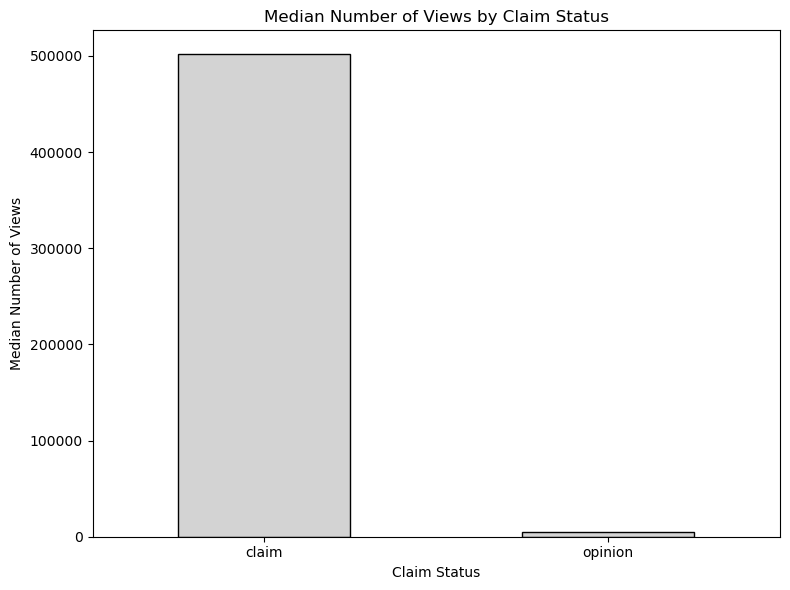

In [48]:
median_views = df.groupby('claim_status')['video_view_count'].median()

plt.figure(figsize=(8, 6))
median_views.plot(kind='bar', color='lightgrey', edgecolor='black')
plt.title('Median Number of Views by Claim Status')
plt.xlabel('Claim Status')
plt.ylabel('Median Number of Views')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### **Total views by claim status**

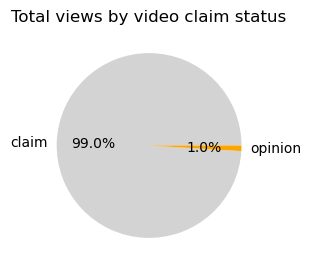

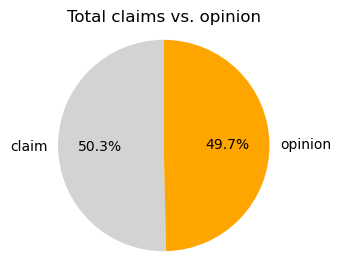

In [64]:
# Plotting total views grouped by claim status
fig = plt.figure(figsize=(3,3))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(), 
        labels=['claim', 'opinion'],
        autopct='%1.1f%%',
        colors=['lightgrey', 'orange'])
plt.title('Total views by video claim status');

#  Plotting total claims vs. opinion
plt.figure(figsize=(3, 3))  
plt.pie(df['claim_status'].value_counts(), 
        labels=df['claim_status'].value_counts().index, 
        autopct='%1.1f%%',
        colors=['lightgrey', 'orange'], 
        startangle=90)
plt.title('Total claims vs. opinion')
plt.axis('equal')  
plt.show()


Even though both categories have the same number of entries in the data set, views for videos that are claims heavily outnumber those that are opinion

### **Outliers**

In [73]:
numerical_columns = {'video_view_count', 'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count'}

for column in numerical_columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    outlier_threshold = median + 1.5*iqr
    outlier_count = (df[column] > outlier_threshold).sum()

    print(f'Number of outliers, {column}: ', outlier_count)


Number of outliers, video_download_count:  3733
Number of outliers, video_view_count:  2343
Number of outliers, video_like_count:  3468
Number of outliers, video_comment_count:  3882
Number of outliers, video_share_count:  3732


#### **Scatterplot**

View count vs. Like count by claim status

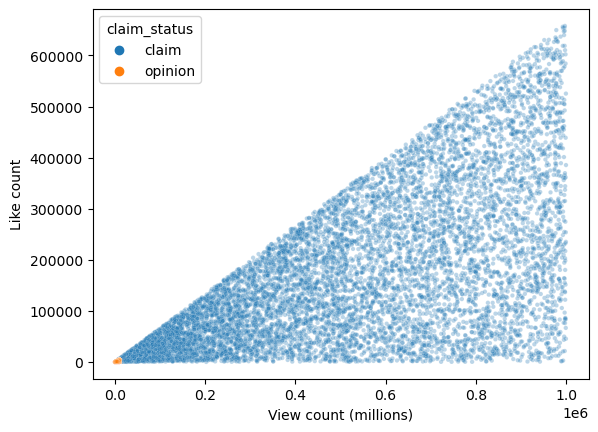

In [78]:
sns.scatterplot(x=df["video_view_count"], 
                y=df["video_like_count"],
                hue=df["claim_status"], 
                s=10, 
                alpha=.3)
plt.xlabel('View count (millions)')
plt.ylabel('Like count')
plt.show()


View count vs. Like count for opinions

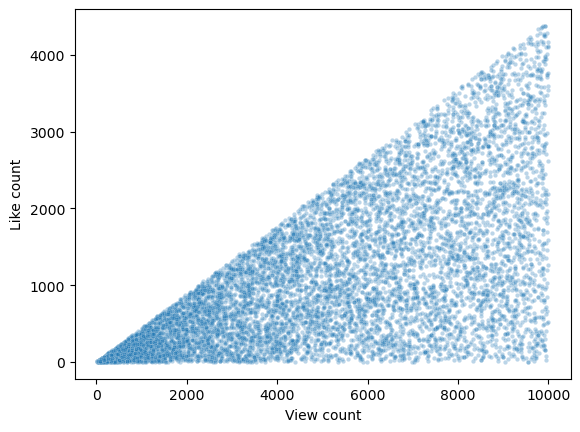

In [80]:
opinion = df[df['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], 
                y=opinion["video_like_count"],
                s=10, 
                alpha=.3)
plt.xlabel('View count')
plt.ylabel('Like count')
plt.show()

### **Conclusion**

The exploratory data analysis (EDA) conducted on the TikTok dataset revealed crucial insights  to the understanding of the distribution and characteristics of various variables in the dataset. The data structuring, cleaning, and subsequent visualization using Python with libraries like Matplotlib and Seaborn contributed significantly to our understanding of the dataset.

Key findings from the EDA included:

- **Video Duration:** All videos typically ranged between 5 to 60 seconds, exhibiting a uniform distribution.
- **Video View Count:** Demonstrated an uneven distribution, with a significant proportion of videos receiving fewer than 100,000 views. However, the distribution became more uniform for view counts exceeding 100,000.
- **Video Like Count:** Similar to view counts, a large number of videos received fewer than 100,000 likes, with a right-skewed distribution towards higher like counts.
- **Video Comment Count:** A vast majority of videos exhibited lower counts of comments, primarily fewer than 100, indicating a highly right-skewed distribution.
- **Video Share Count and Video Download Count:** Both had distributions skewed to the right, with the majority of videos receiving fewer shares and downloads.

Moreover, the visualizations revealed correlations between variables, particularly the relationship between author ban status and claim status, shedding light on the association between video characteristics and the nature of content (claim or opinion).

The assessment of outliers highlighted that even though there seem to be many outliers indicating high engagement, they align with what you would expect from viral content on the platform.


**Importance of Exploratory Data Analysis (EDA):**

EDA plays a crucial role in comprehending the dataset, identifying outliers, handling missing values, and preparing the data for future modeling. It assists data professionals in making informed decisions concerning outliers, duplicate values, and missing data, crucial for model design and accuracy.

